# 2023與2022QS排名比較與分析、與臺灣各大學資源分析比對

## 零、資料觀察
a. 2023年參加QS排名的所有學校，在世界地圖上的分佈

b. 師大在2022與2023的排名比較？

c. 哪些國家在2023年從100名外進入100內？哪些國家在2023年從100名內進入100外？及其它子問題。

## 一、問題
1. 2023年QS排名前一百，在世界地圖上的分佈—觀察哪些國家有較高密度的前百大學
2. 在2022年，前百學校，各個region的比例是多少？
3. 在2022年，在各個region，有多少比例的大學可以進到前百？
4. 比較2022年和2023年，前百大學名次進步，來自哪些region、以及比例？
5. 比較2022年和2023年，前百大學名次退步，來自哪些region、以及比例？
6. 由於有可能因為該國本身大學數量就多所以也有可能造成進步的可能性更大，因此用同分母比較：2022年和2023年，前百大學名次退步，來自哪些region、以及比例？（也就是前百大學裡面來自自己的region有多少進步）
7. 由於有可能因為該國本身大學數量就多所以也有可能造成退步的可能性更大，因此用同分母比較：2022年和2023年，前百大學名次退步，來自哪些region、以及比例？（也就是前百大學裡面來自自己的region有多少退步）
8. 台灣有參與QS排名的大學，在QS排名的位置為何
9. 以每200名為區間，計算在該區間台灣有參與QS排名的大學，有多少間？
10. 以教育部高等教育深耕計畫經費，與QS排名的關係？
11. 各大學圖書總量與QS排名的關係？
12. 各大學圖書閱覽座位數與QS排名的關係？
13. 各大學全年圖書(含視聽資料及其他館藏)借閱人次與QS排名的關係？

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = 'Arial'

In [10]:
df_2023 = pd.read_csv('2023_r.csv')
df_2023.head()

,Rank,Institution,LocationCode,Location,ArScore,ArRank,ErScore,ErRank,FsrScore,FsrRank,...,CpfRank,IfrScore,IfrRank,IsrScore,IsrRank,IrnScore,IrnRank,GerScore,GerRank,ScoreScaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6


In [11]:
df_2022 = pd.read_csv('2022_r.csv')
df_2022.head()

,year,rank_display,university,score,link,country,city,region,logo
0,2022,1,Massachusetts Institute of Technology (MIT),100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
1,2022,2,University of Oxford,99.5,https://www.topuniversities.com/universities/u...,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...
2,2022,=3,Stanford University,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...
3,2022,=3,University of Cambridge,98.7,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...
4,2022,5,Harvard University,98.0,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...


## a. 2023年參加QS排名的所有學校，在世界地圖上的分佈

/var/folders/zs/h5hxmzb56w92fyghx3mfp69w0000gn/T/ipykernel_5792/2604204598.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


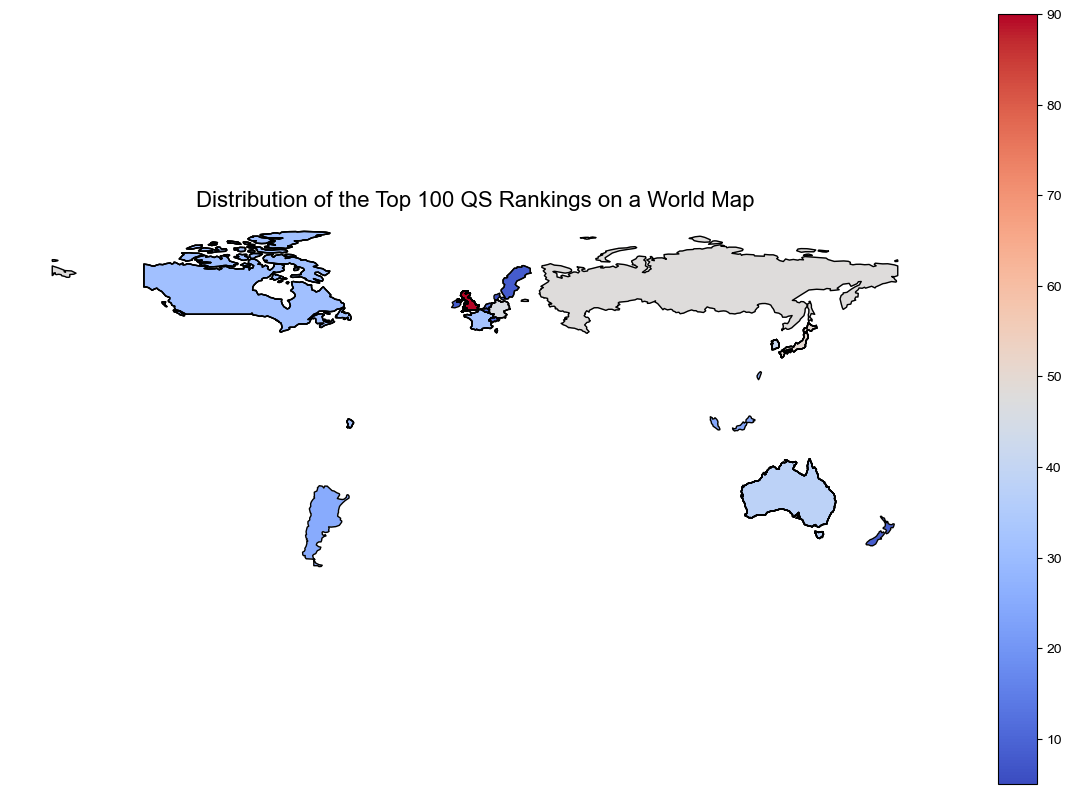

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


df_2023['data_count'] = df_2023.groupby('Location')['Location'].transform('count')

top_100_countries = df_2023[df_2023['Rank'] <= 100]

merged_data = world.merge(top_100_countries, left_on='name', right_on='Location')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1, color='k')
merged_data.plot(column='data_count', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Distribution of the Top 100 QS Rankings on a World Map', fontsize=16)
ax.set_axis_off()

plt.show()


## b. 師大在2022與2023的排名比較？

In [14]:
name_to_find = 'National Taiwan Normal University'

filtered_rows = df_2023[df_2023['Institution'] == name_to_find]

result_data = filtered_rows['Rank']

print(result_data)

331    332
Name: Rank, dtype: int64


In [15]:
filtered_rows = df_2022[df_2022['university'] == name_to_find]

result_data = filtered_rows['rank_display']

print(result_data)

335    =334
Name: rank_display, dtype: object


## c. 哪些國家在2023年從100名外進入100內？哪些國家在2023年從100名內進入100外？及其它子問題。

In [16]:
uni_names_2023 = df_2023['Institution']
uni_names_2022 = df_2022['university']


uni_names_2023_set = set(uni_names_2023)
uni_names_2022_set = set(uni_names_2022)

#print(uni_names_2023_set)
print(len(uni_names_2023_set))

#print(uni_names_2022_set)
print(len(uni_names_2022_set))

1422
1300


In [17]:
#2022在，但2023不在 QS名單內的學校 及 數量
in22_23out = len(uni_names_2022_set - uni_names_2023_set)

print(in22_23out)
print(uni_names_2022_set - uni_names_2023_set)

25
{'Sciences Po', "King Mongkut's Institute of Technology Ladkrabang", 'Universidad Nacional Costa Rica', 'Universidad Autonoma Chapingo', 'Università Cattolica del Sacro Cuore', 'Ryerson University', 'Bogaziçi Üniversitesi', 'Universidad Nacional Autónoma de México  (UNAM)', 'Universidad de Panamá - UP', 'Universität  Leipzig', 'Pontificia Universidad Catolica del Peru', 'Smith College', 'MGIMO School of Business and International Proficiency', 'S. Toraighyrov Pavlodar State University', 'Università di Padova', 'Ulm University', 'Vilnius Gediminas Technical University (VILNIUS TECH)', 'Université de Paris', 'Universidad Nacional de Tucumà¡n', 'Sungkyunkwan University (SKKU)', "Université Côte d'Azur", 'National Technical University  "Kharkiv Polytechnic Institute"', 'Universitatea de Vest din Timisoara /  West University of Timisoara', 'Indian Institute of Information Technology, Allahabad', 'Khalifa University'}


In [18]:
#2023在，但2022不在 QS名單內的學校 及 數量

in23_22out = len(uni_names_2023_set - uni_names_2022_set)
print(in23_22out)
print(uni_names_2023_set - uni_names_2022_set)

147
{'Khoja Akhmet Yassawi International Kazakh-Turkish University', 'CEU Universities', 'University of South Bohemia', 'Poznan University of Life Sciences', 'Universidade Presbiteriana Mackenzie', 'Shoolini University of Biotechnology and Management Sciences', 'Odessa I.I. Mechnikov National University', 'Universidad de Piura', 'Nanjing Normal University', 'Zhengzhou University', 'Universiti Tun Hussein Onn University of Malaysia (UTHM)', 'California State University Long Beach', 'Almaty Technological University', 'Universidad Autónoma de Aguascalientes', 'Illinois State University', 'Universitatea de Vest din Timisoara / West University of Timisoara', 'California Polytechnic State University', 'Shanghai Normal University', 'Universidad de Cuenca', 'Swarthmore College', 'Indian Institute of Technology (BHU) Varanasi', 'Chandigarh University', 'Universidad del Valle de Mexico (UVM)', 'University of Dubai', 'Huazhong Agricultural University', 'University of Regina', 'National University

In [19]:
print(len(uni_names_2023_set) - len(uni_names_2022_set))
print(in23_22out - in22_23out)

122
122


### 由上述可知資料正確（2023總數減去2022總數 == 2023新增數量 - 2023減少數量）

### 只取前一百名比較

In [20]:
df_2023_100 = df_2023.head(100)
df_2022_100 = df_2022.head(100)

In [21]:
uni_names_2023_100 = df_2023_100['Institution']
uni_names_2022_100 = df_2022_100['university']

uni_names_2023_100_set = set(uni_names_2023_100)
uni_names_2022_100_set = set(uni_names_2022_100)

In [22]:
#2023、2022皆在QS名單100名內的學校 及 數量
print(len(uni_names_2023_100_set & uni_names_2022_100_set))
print(uni_names_2023_100_set & uni_names_2022_100_set)

98
{'National Taiwan University (NTU)', 'California Institute of Technology (Caltech)', 'Duke University', 'Tsinghua University', 'The University of Tokyo', 'Johns Hopkins University', 'The University of Sydney', 'The Hong Kong Polytechnic University', 'The University of Western Australia', 'Seoul National University', 'Yonsei University', 'University of Toronto', 'Institut Polytechnique de Paris', 'Stanford University', 'Yale University', 'Ludwig-Maximilians-Universität München', 'Carnegie Mellon University', 'University of Zurich', 'KU Leuven', 'Princeton University', 'Lomonosov Moscow State University', 'The Hong Kong University of Science and Technology', 'Ruprecht-Karls-Universität Heidelberg', 'Pohang University of Science And Technology (POSTECH)', 'National University of Singapore (NUS)', 'Harvard University', 'University of Amsterdam', 'University of Oxford', 'University of Pennsylvania', 'Lund University', 'Nanyang Technological University, Singapore (NTU)', 'University of Ca

In [23]:
print(len(uni_names_2022_100_set))
print(len(uni_names_2023_100_set))

100
100


In [24]:
#2022在，但2023不在 QS名單100名內的學校 及 數量
print(len(uni_names_2022_100_set - uni_names_2023_100_set))
print(uni_names_2022_100_set - uni_names_2023_100_set)

2
{'Technical University of Denmark', 'Sungkyunkwan University (SKKU)'}


In [25]:
#2023在，但2022不在 QS名單100內的學校 及 數量
print(len(uni_names_2023_100_set - uni_names_2022_100_set))
print(uni_names_2023_100_set - uni_names_2022_100_set)

2
{'Trinity College Dublin, The University of Dublin', 'Sungkyunkwan University(SKKU)'}


#### 出現問題：名單及數量不符合邏輯

* 使用以下方式來處理格式一致性和拼寫正確性
    * 格式一致性：確保您的 uni_names_2022_100_set 和 uni_names_2023_100_set 中的學校名稱具有一致的格式，包括大小寫和空格。您可以使用字串操作來標準化名稱的格式，以確保比較準確。
    * 拼寫正確性：檢查學校名稱的拼寫是否完全相同。拼寫不一致可能會導致比較失敗。您可以使用字典或模糊匹配算法來處理拼寫不一致的情況。

In [26]:
# 將學校名稱轉為小寫並去除空格
uni_names_2022_100_set = {name.strip().lower() for name in uni_names_2022_100_set}
uni_names_2023_100_set = {name.strip().lower() for name in uni_names_2023_100_set}

# 找到2022在，但2023不在 QS名單100名內的學校
not_in_2023 = uni_names_2022_100_set - uni_names_2023_100_set

# 找到2023在，但2022不在 QS名單100內的學校
not_in_2022 = uni_names_2023_100_set - uni_names_2022_100_set

print(not_in_2023)
print(not_in_2022)

{'technical university of denmark', 'sungkyunkwan university (skku)'}
{'trinity college dublin, the university of dublin', 'sungkyunkwan university(skku)'}


#### 出現問題：名單及數量仍然不符合邏輯

* 將學校名稱轉為小寫，同時移除括號

In [27]:
# 將學校名稱轉為小寫，同時移除括號
def normalize_name(name):
    name = name.lower()
    name = name.replace('(', '').replace(')', '').strip()
    return name

uni_names_2022_100_set = {normalize_name(name) for name in uni_names_2022_100_set}
uni_names_2023_100_set = {normalize_name(name) for name in uni_names_2023_100_set}

# 找到2022在，但2023不在 QS名單100名內的學校
not_in_2023 = uni_names_2022_100_set - uni_names_2023_100_set

# 找到2023在，但2022不在 QS名單100內的學校
not_in_2022 = uni_names_2023_100_set - uni_names_2022_100_set

print(not_in_2023)
print(not_in_2022)


{'sungkyunkwan university skku', 'technical university of denmark'}
{'sungkyunkwan universityskku', 'trinity college dublin, the university of dublin'}


#### 處理sungkyunkwan university skku 和 sungkyunkwan universityskku 的問題

In [28]:
# 將學校名稱轉為小寫，同時移除空格和連接字元
def normalize_name(name):
    name = name.lower()
    name = name.replace(' ', '').replace('-', '').strip()
    return name

uni_names_2022_100_set = {normalize_name(name) for name in uni_names_2022_100_set}
uni_names_2023_100_set = {normalize_name(name) for name in uni_names_2023_100_set}

# 找到2022在，但2023不在 QS名單100名內的學校
not_in_2023 = uni_names_2022_100_set - uni_names_2023_100_set

# 找到2023在，但2022不在 QS名單100內的學校
not_in_2022 = uni_names_2023_100_set - uni_names_2022_100_set

print(not_in_2023)
print(not_in_2022)


{'technicaluniversityofdenmark'}
{'trinitycollegedublin,theuniversityofdublin'}


#### 重新檢查

In [29]:
#2022在，但2023不在 QS名單100名內的學校 及 數量
print(len(uni_names_2022_100_set - uni_names_2023_100_set))
print(uni_names_2022_100_set - uni_names_2023_100_set)

1
{'technicaluniversityofdenmark'}


In [30]:
#2023在，但2022不在 QS名單100內的學校 及 數量
print(len(uni_names_2023_100_set - uni_names_2022_100_set))
print(uni_names_2023_100_set - uni_names_2022_100_set)

1
{'trinitycollegedublin,theuniversityofdublin'}


In [31]:
#2023、2022皆在QS名單100名內的學校 及 數量
print(len(uni_names_2023_100_set & uni_names_2022_100_set))
print(uni_names_2023_100_set & uni_names_2022_100_set)

99
{'pohanguniversityofscienceandtechnologypostech', 'universityofscienceandtechnologyofchina', 'universityofcalifornia,sandiegoucsd', 'kuleuven', 'brownuniversity', 'yaleuniversity', 'carnegiemellonuniversity', 'epfl', 'universityofpennsylvania', 'columbiauniversity', 'universityofleeds', 'theuniversityofsydney', 'universityofglasgow', 'lomonosovmoscowstateuniversity', 'theuniversityofmanchester', 'technicaluniversityofmunich', 'georgiainstituteoftechnology', 'theuniversityofauckland', 'pennsylvaniastateuniversity', 'universitépsl', 'imperialcollegelondon', 'universityofwisconsinmadison', 'nanyangtechnologicaluniversity,singaporentu', 'ludwigmaximiliansuniversitätmünchen', 'universidaddebuenosairesuba', 'tsinghuauniversity', 'monashuniversity', 'osakauniversity', 'cityuniversityofhongkong', 'thehongkonguniversityofscienceandtechnology', 'fudanuniversity', 'riceuniversity', 'universitéparissaclay', 'zhejianguniversity', 'lunduniversity', 'kthroyalinstituteoftechnology', 'massachusettsi

## 1. 2023年QS排名前一百，在世界地圖上的分佈—觀察哪些國家有較高密度的前百大學

/var/folders/zs/h5hxmzb56w92fyghx3mfp69w0000gn/T/ipykernel_5792/3428518265.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


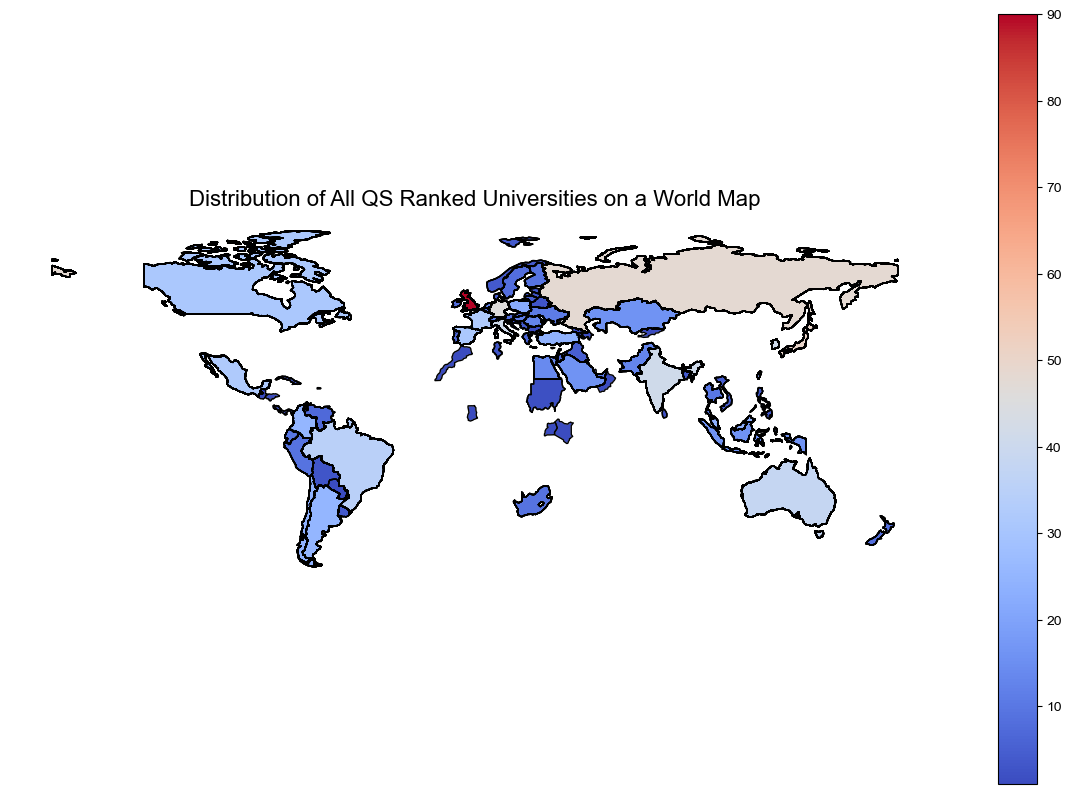

In [32]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


df_2023['data_count'] = df_2023.groupby('Location')['Location'].transform('count')

merged_data = world.merge(df_2023, left_on='name', right_on='Location')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1, color='k')
merged_data.plot(column='data_count', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Distribution of All QS Ranked Universities on a World Map', fontsize=16)
ax.set_axis_off()

plt.show()

## 2. 在2022年，前百學校，各個region的比例是多少？

In [33]:
region = df_2022['region'].unique()
print(region)

['North America' 'Europe' 'Asia' 'Oceania' 'Latin America' 'Africa']


In [34]:
amounts = df_2022['region'].value_counts()
print(amounts)

Europe           468
Asia             399
North America    205
Latin America    151
Oceania           46
Africa            31
Name: region, dtype: int64


In [35]:
amounts_100 = df_2022_100['region'].value_counts()
print(amounts_100)

Europe           35
North America    30
Asia             26
Oceania           8
Latin America     1
Name: region, dtype: int64


In [36]:
amounts_dict = amounts_100.to_dict()
print(amounts_dict)

{'Europe': 35, 'North America': 30, 'Asia': 26, 'Oceania': 8, 'Latin America': 1}


#### 確認datatype以將其存成dictionary

In [37]:
print(type(amounts_100))

<class 'pandas.core.series.Series'>


In [38]:
amounts_dict = amounts.to_dict()
print(amounts_dict)

{'Europe': 468, 'Asia': 399, 'North America': 205, 'Latin America': 151, 'Oceania': 46, 'Africa': 31}


In [39]:
amounts_100_dict = amounts_100.to_dict()
print(amounts_100_dict)

{'Europe': 35, 'North America': 30, 'Asia': 26, 'Oceania': 8, 'Latin America': 1}


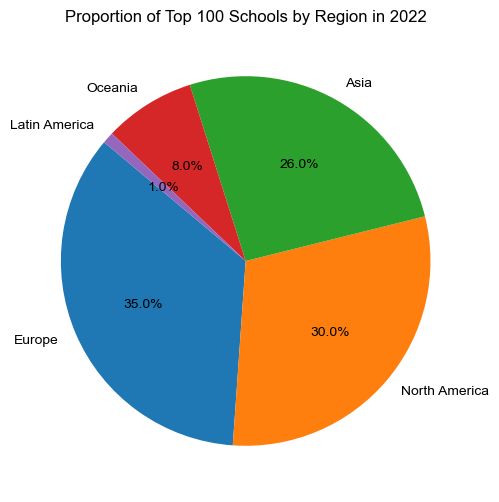

In [41]:
labels = amounts_100_dict.keys()
sizes = amounts_100_dict.values()

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('Proportion of Top 100 Schools by Region in 2022')

plt.show()

## 3. 在2022年，在各個region，有多少比例的大學可以進到前百？

#### dictionary要記得對key再取value

In [42]:
ratios = {}

for key, value1 in amounts_dict.items():
    if key in amounts_100_dict:
        ratio = f'{amounts_100_dict[key]}/{value1}'
        ratios[key] = ratio

print(ratios)

{'Europe': '35/468', 'Asia': '26/399', 'North America': '30/205', 'Latin America': '1/151', 'Oceania': '8/46'}


In [43]:
percentages = {}

for key, value1 in amounts_dict.items():
    if key in amounts_100_dict:
        ratio = (amounts_100_dict[key] / value1) * 100
        percentages[key] = ratio

print(percentages)

{'Europe': 7.478632478632479, 'Asia': 6.516290726817042, 'North America': 14.634146341463413, 'Latin America': 0.6622516556291391, 'Oceania': 17.391304347826086}


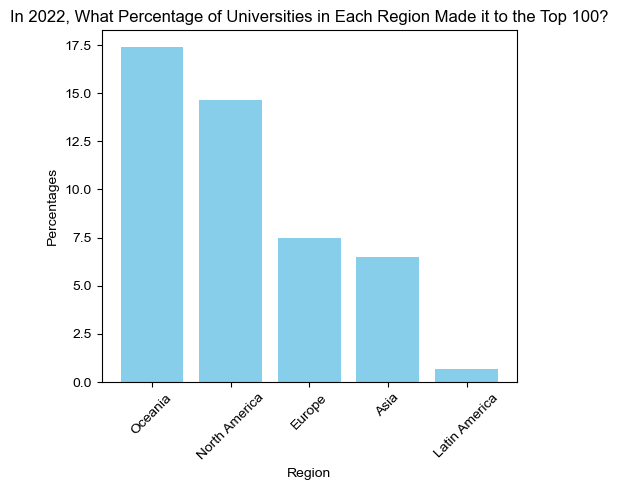

In [45]:
sorted_data = sorted(percentages.items(), key=lambda x: x[1], reverse=True)

categories, values = zip(*sorted_data)

plt.figure(figsize=(5, 5))
plt.bar(categories, values, color='skyblue')

plt.title('In 2022, What Percentage of Universities in Each Region Made it to the Top 100?')
plt.xlabel('Region')
plt.ylabel('Percentages')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. 比較2022年和2023年，前百大學名次進步，來自哪些region、以及比例？

### 確保兩個df的column names一致

In [46]:
column_names_2022 = df_2022_100.columns.tolist()
print(column_names_2022)

['year', 'rank_display', 'university', 'score', 'link', 'country', 'city', 'region', 'logo']


In [47]:
df_2022_100.columns = ['year', 'rank_2022', 'university', 'score', 'link', 'country', 'city', 'region', 'logo']

In [48]:
column_names_2023 = df_2023_100.columns.tolist()
print(column_names_2023)

['Rank', 'Institution', 'LocationCode', 'Location', 'ArScore', 'ArRank', 'ErScore', 'ErRank', 'FsrScore', 'FsrRank', 'CpfScore', 'CpfRank', 'IfrScore', 'IfrRank', 'IsrScore', 'IsrRank', 'IrnScore', 'IrnRank', 'GerScore', 'GerRank', 'ScoreScaled', 'data_count']


In [49]:
df_2023_100.columns = ['rank_2023', 'university', 'LocationCode', 'Location', 'ArScore', 'ArRank', 'ErScore', 'ErRank', 'FsrScore', 'FsrRank', 'CpfScore', 'CpfRank', 'IfrScore', 'IfrRank', 'IsrScore', 'IsrRank', 'IrnScore', 'IrnRank', 'GerScore', 'GerRank', 'ScoreScaled', 'data_count']

In [50]:
merged_df = pd.merge(df_2022_100, df_2023_100, on='university', suffixes=('_2022', '_2023'))

result_df = merged_df[['university', 'rank_2022', 'rank_2023']]
result_df.head()

,university,rank_2022,rank_2023
0,Massachusetts Institute of Technology (MIT),1,1
1,University of Oxford,2,4
2,Stanford University,=3,3
3,University of Cambridge,=3,2
4,Harvard University,5,5


In [51]:
result_df = result_df.copy()
result_df['rank_2022'] = result_df['rank_2022'].str.replace('=', '', regex=False)
result_df

,university,rank_2022,rank_2023
0,Massachusetts Institute of Technology (MIT),1,1
1,University of Oxford,2,4
2,Stanford University,3,3
3,University of Cambridge,3,2
4,Harvard University,5,5
...,...,...,...
93,The University of Western Australia,93,90
94,Rice University,94,100
95,The University of Sheffield,95,96
96,Pennsylvania State University,96,93


In [52]:
result_df

,university,rank_2022,rank_2023
0,Massachusetts Institute of Technology (MIT),1,1
1,University of Oxford,2,4
2,Stanford University,3,3
3,University of Cambridge,3,2
4,Harvard University,5,5
...,...,...,...
93,The University of Western Australia,93,90
94,Rice University,94,100
95,The University of Sheffield,95,96
96,Pennsylvania State University,96,93


In [53]:
value_2022 = result_df.loc[93, 'rank_2022']
value_2023 = result_df.loc[93, 'rank_2023']

print(type(value_2022))
print(type(value_2023))
print(value_2022 == value_2023)

<class 'str'>
<class 'numpy.int64'>
False


In [54]:
result_df['rank_2022'] = result_df['rank_2022'].astype(np.int64)

In [55]:
value_2022 = result_df.loc[93, 'rank_2022']
value_2023 = result_df.loc[93, 'rank_2023']

print(type(value_2022))
print(type(value_2023))
print(value_2022)
print(value_2023)
print(value_2022 == value_2023)

<class 'numpy.int64'>
<class 'numpy.int64'>
93
90
False


In [56]:
equal_list = []
better_list = []
worse_list = []

for index, row in result_df.iterrows():
    rank_2022 = row['rank_2022']
    rank_2023 = row['rank_2023']
    university = row['university']

    if rank_2022 == rank_2023:
        equal_list.append(university)
    elif rank_2022 > rank_2023:
        better_list.append(university)
    else:
        worse_list.append(university)

In [57]:
print(len(equal_list))
print(len(better_list))
print(len(worse_list))

15
36
47


### Better

In [59]:
better_list

['University of Cambridge',
 'The University of Edinburgh',
 'Tsinghua University',
 'Peking University',
 'Princeton University',
 'Cornell University',
 'The University of Hong Kong',
 'Johns Hopkins University',
 'University of California, Berkeley (UCB)',
 'Seoul National University',
 'The University of Melbourne',
 'The Chinese University of Hong Kong (CUHK)',
 'New York University (NYU)',
 'Université PSL',
 'Zhejiang University',
 'Institut Polytechnique de Paris',
 'Shanghai Jiao Tong University',
 'Technical University of Munich',
 'Duke University',
 'Carnegie Mellon University',
 'Tokyo Institute of Technology (Tokyo Tech)',
 'Monash University',
 'Ludwig-Maximilians-Universität München',
 'Universidad de Buenos Aires (UBA)',
 'Sorbonne University',
 'Osaka University',
 'Lomonosov Moscow State University',
 'Yonsei University',
 'Pohang University of Science And Technology (POSTECH)',
 'Tohoku University',
 'University of Washington',
 'Université Paris-Saclay',
 'Universi

In [60]:
result_dict = {}

for item in better_list:
    matching_rows = df_2022[df_2022['university'] == item]
    
    if not matching_rows.empty:
        region = matching_rows.iloc[0]['region']
        result_dict[item] = region

print(result_dict)

{'University of Cambridge': 'Europe', 'The University of Edinburgh': 'Europe', 'Tsinghua University': 'Asia', 'Peking University': 'Asia', 'Princeton University': 'North America', 'Cornell University': 'North America', 'The University of Hong Kong': 'Asia', 'Johns Hopkins University': 'North America', 'University of California, Berkeley (UCB)': 'North America', 'Seoul National University': 'Asia', 'The University of Melbourne': 'Oceania', 'The Chinese University of Hong Kong (CUHK)': 'Asia', 'New York University (NYU)': 'North America', 'Université PSL': 'Europe', 'Zhejiang University': 'Asia', 'Institut Polytechnique de Paris': 'Europe', 'Shanghai Jiao Tong University': 'Asia', 'Technical University of Munich': 'Europe', 'Duke University': 'North America', 'Carnegie Mellon University': 'North America', 'Tokyo Institute of Technology (Tokyo Tech)': 'Asia', 'Monash University': 'Oceania', 'Ludwig-Maximilians-Universität München': 'Europe', 'Universidad de Buenos Aires (UBA)': 'Latin Ame

In [61]:
from collections import Counter

region_counter = Counter(result_dict.values())

for region, count in region_counter.items():
    print(f"Region: {region}, Count: {count}")

Region: Europe, Count: 10
Region: Asia, Count: 13
Region: North America, Count: 9
Region: Oceania, Count: 3
Region: Latin America, Count: 1


In [62]:
from collections import Counter

region_counter = Counter(result_dict.values())

region_dict = {region: count for region, count in region_counter.items()}

print(region_dict)

{'Europe': 10, 'Asia': 13, 'North America': 9, 'Oceania': 3, 'Latin America': 1}


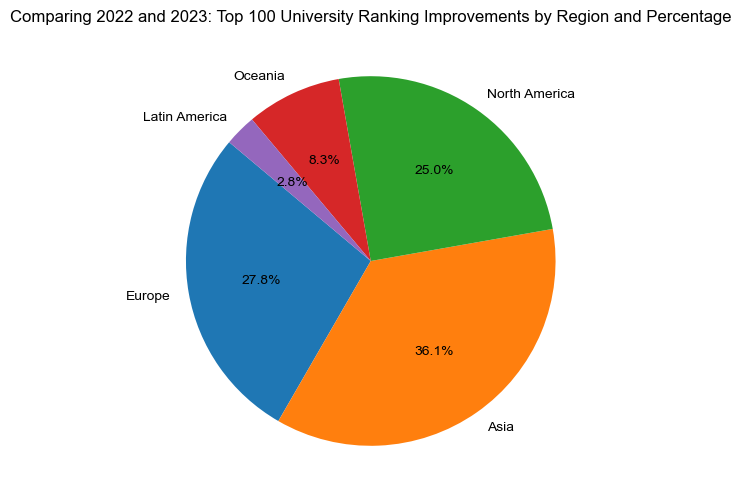

In [63]:
labels = region_dict.keys()
sizes = region_dict.values()

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('Comparing 2022 and 2023: Top 100 University Ranking Improvements by Region and Percentage')

plt.show()

## 5. 由於有可能因為該國本身大學數量就多所以也有可能造成進步的可能性更大，因此用同分母比較：2022年和2023年，前百大學名次退步，來自哪些region、以及比例？（也就是前百大學裡面來自自己的region有多少進步）

In [64]:
region_dict

{'Europe': 10,
 'Asia': 13,
 'North America': 9,
 'Oceania': 3,
 'Latin America': 1}

In [65]:
amounts_dict

{'Europe': 468,
 'Asia': 399,
 'North America': 205,
 'Latin America': 151,
 'Oceania': 46,
 'Africa': 31}

In [66]:
result_dict = {}

for key in region_dict:
    if key in amounts_dict:
        result_dict[key] = region_dict[key] / amounts_dict[key] * 100

print(result_dict)

{'Europe': 2.1367521367521367, 'Asia': 3.258145363408521, 'North America': 4.390243902439024, 'Oceania': 6.521739130434782, 'Latin America': 0.6622516556291391}


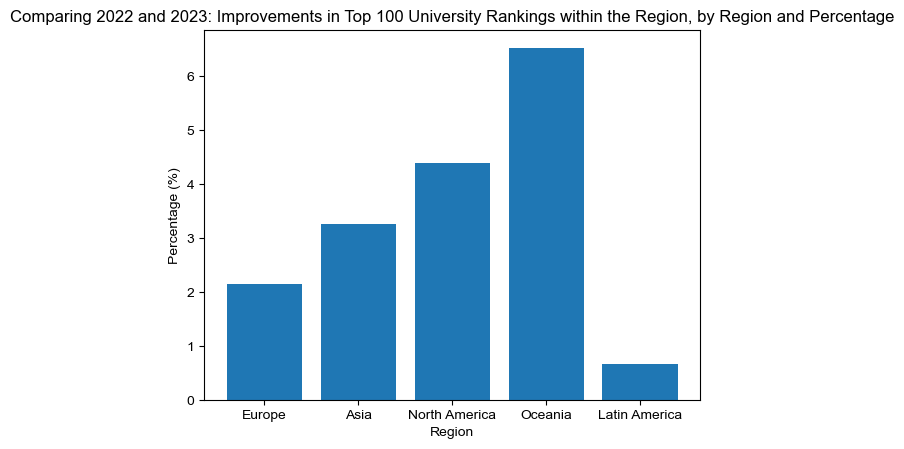

In [67]:
keys = list(result_dict.keys())
values = list(result_dict.values())

plt.bar(keys, values)

plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.title('Comparing 2022 and 2023: Improvements in Top 100 University Rankings within the Region, by Region and Percentage')

plt.show()

## 6. 比較2022年和2023年，前百大學名次退步，來自哪些region、以及比例？

### Worse

In [69]:
worse_list

['University of Oxford',
 'ETH Zurich - Swiss Federal Institute of Technology',
 'Nanyang Technological University, Singapore (NTU)',
 'EPFL',
 'Yale University',
 'Columbia University',
 'University of Michigan-Ann Arbor',
 'University of Toronto',
 'McGill University',
 'The Australian National University',
 'The University of Manchester',
 'Northwestern University',
 'Fudan University',
 'Kyoto University',
 'The Hong Kong University of Science and Technology',
 "King's College London",
 'The University of Sydney',
 'University of California, Los Angeles (UCLA)',
 'KAIST - Korea Advanced Institute of Science & Technology',
 'The University of New South Wales (UNSW Sydney)',
 'University of British Columbia',
 'The University of Queensland',
 'University of California, San Diego (UCSD)',
 'The London School of Economics and Political Science (LSE)',
 'City University of Hong Kong',
 'University of Amsterdam',
 'Delft University of Technology',
 'Brown University',
 'The University of

In [70]:
worse_result_dict = {}

for item in worse_list:
    matching_rows = df_2022[df_2022['university'] == item]
    
    if not matching_rows.empty:
        region = matching_rows.iloc[0]['region']
        
        worse_result_dict[item] = region

print(worse_result_dict)

{'University of Oxford': 'Europe', 'ETH Zurich - Swiss Federal Institute of Technology': 'Europe', 'Nanyang Technological University, Singapore (NTU)': 'Asia', 'EPFL': 'Europe', 'Yale University': 'North America', 'Columbia University': 'North America', 'University of Michigan-Ann Arbor': 'North America', 'University of Toronto': 'North America', 'McGill University': 'North America', 'The Australian National University': 'Oceania', 'The University of Manchester': 'Europe', 'Northwestern University': 'North America', 'Fudan University': 'Asia', 'Kyoto University': 'Asia', 'The Hong Kong University of Science and Technology': 'Asia', "King's College London": 'Europe', 'The University of Sydney': 'Oceania', 'University of California, Los Angeles (UCLA)': 'North America', 'KAIST - Korea Advanced Institute of Science & Technology': 'Asia', 'The University of New South Wales (UNSW Sydney)': 'Oceania', 'University of British Columbia': 'North America', 'The University of Queensland': 'Oceania

In [71]:
from collections import Counter

region_counter = Counter(worse_result_dict.values())

for region, count in region_counter.items():
    print(f"Region: {region}, Count: {count}")

Region: Europe, Count: 20
Region: Asia, Count: 8
Region: North America, Count: 14
Region: Oceania, Count: 5


In [72]:
from collections import Counter

region_counter = Counter(worse_result_dict.values())

region_dict = {region: count for region, count in region_counter.items()}

print(region_dict)


{'Europe': 20, 'Asia': 8, 'North America': 14, 'Oceania': 5}


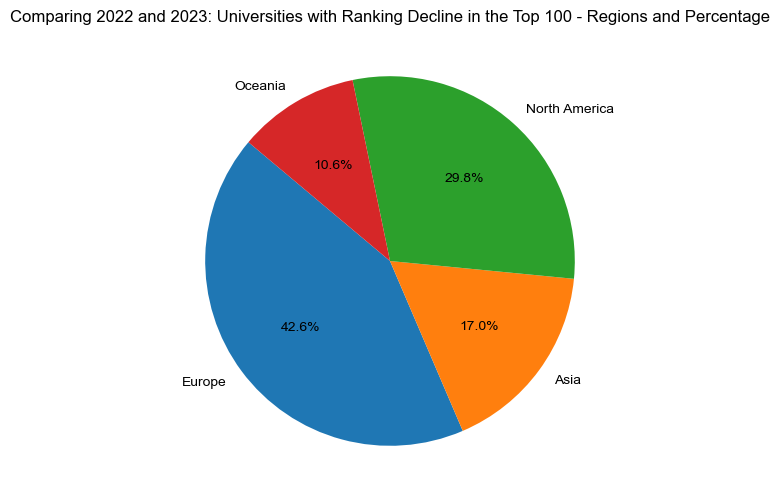

In [73]:
labels = region_dict.keys()
sizes = region_dict.values()

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('Comparing 2022 and 2023: Universities with Ranking Decline in the Top 100 - Regions and Percentage')

plt.show()

## 7. 由於有可能因為該國本身大學數量就多所以也有可能造成退步的可能性更大，因此用同分母比較：2022年和2023年，前百大學名次退步，來自哪些region、以及比例？（也就是前百大學裡面來自自己的region有多少退步）

In [74]:
region_dict

{'Europe': 20, 'Asia': 8, 'North America': 14, 'Oceania': 5}

In [75]:
amounts_dict

{'Europe': 468,
 'Asia': 399,
 'North America': 205,
 'Latin America': 151,
 'Oceania': 46,
 'Africa': 31}

In [76]:
result_dict = {}

for key in region_dict:
    if key in amounts_dict:
        result_dict[key] = region_dict[key] / amounts_dict[key] * 100

print(result_dict)

{'Europe': 4.273504273504273, 'Asia': 2.0050125313283207, 'North America': 6.829268292682928, 'Oceania': 10.869565217391305}


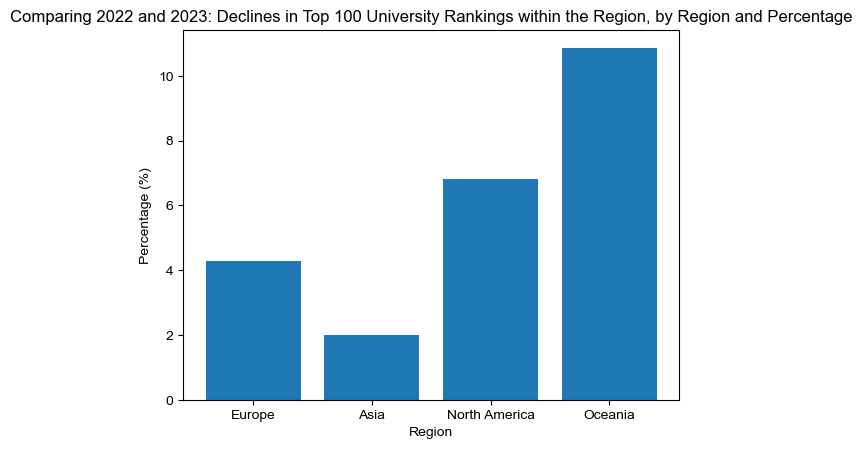

In [77]:
keys = list(result_dict.keys())
values = list(result_dict.values())

plt.bar(keys, values)

plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.title('Comparing 2022 and 2023: Declines in Top 100 University Rankings within the Region, by Region and Percentage')

plt.show()

## 8. 台灣有參與QS排名的大學，在QS排名的位置為何?

In [78]:
df_tw_uni = pd.read_csv('tw_uni.csv')
df_tw_uni.head()

,序號,學校代碼,公私立,體制,學校名稱,學校英文名稱,職稱,姓名,縣市別,第三級行政區,郵遞區號,學校地址,學校總機,學校傳真,網址
0,1,1,公立,一般大學,國立政治大學,National Chengchi University,校長,李蔡彥,臺北市,文山區,116011,臺北市文山區指南路2段64號,02-2939-3091,02-2937-9611,http://www.nccu.edu.tw
1,2,2,公立,一般大學,國立清華大學,National Tsing Hua University,校長,高為元,新竹市,新竹市,300044,新竹市光復路2段101號,03-571-5131,03-572-4038,http://www.nthu.edu.tw
2,3,3,公立,一般大學,國立臺灣大學,National Taiwan University,校長,管中閔,臺北市,大安區,106319,臺北市大安區羅斯福路4段1號,02-3366-3366,02-2362-7651,http://www.ntu.edu.tw
3,4,4,公立,一般大學,國立臺灣師範大學,National Taiwan Normal University,校長,吳正己,臺北市,大安區,106209,臺北市大安區和平東路1段162號,02-7749-1111,無,http://www.ntnu.edu.tw
4,5,5,公立,一般大學,國立成功大學,National Cheng Kung University,校長,蘇慧貞,臺南市,東 區,701401,臺南市東區大學路1號,06-275-7575,06-276-6462,https://www.ncku.edu.tw/


In [79]:
column_names_tw_uni = df_tw_uni.columns.tolist()
print(column_names_tw_uni)

['序號', '學校代碼', '公私立', '體制', '學校名稱', '學校英文名稱', '職稱', '姓名', '縣市別', '第三級行政區', '郵遞區號', '學校地址', '學校總機', '學校傳真', '網址']


In [80]:
df_tw_uni.columns = ['序號', '學校代碼', '公私立', '體制', '學校名稱', 'Institution', '職稱', '姓名', '縣市別', '第三級行政區', '郵遞區號', '學校地址', '學校總機', '學校傳真', '網址']

In [81]:
column_names_tw_uni = df_tw_uni.columns.tolist()
print(column_names_tw_uni)

['序號', '學校代碼', '公私立', '體制', '學校名稱', 'Institution', '職稱', '姓名', '縣市別', '第三級行政區', '郵遞區號', '學校地址', '學校總機', '學校傳真', '網址']


In [82]:
column_names_2023 = df_2023.columns.tolist()
print(column_names_2023)


['Rank', 'Institution', 'LocationCode', 'Location', 'ArScore', 'ArRank', 'ErScore', 'ErRank', 'FsrScore', 'FsrRank', 'CpfScore', 'CpfRank', 'IfrScore', 'IfrRank', 'IsrScore', 'IsrRank', 'IrnScore', 'IrnRank', 'GerScore', 'GerRank', 'ScoreScaled', 'data_count']


In [83]:
import re
for index, row in df_2023.iterrows():
    institution = row['Institution']
    if '(' in institution and ')' in institution:
        institution = re.sub(r'\(.*\)', '', institution)
    institution = institution.rstrip()
    df_2023.at[index, 'Institution'] = institution

In [84]:
df_2023.head()

,Rank,Institution,LocationCode,Location,ArScore,ArRank,ErScore,ErRank,FsrScore,FsrRank,...,IfrScore,IfrRank,IsrScore,IsrRank,IrnScore,IrnRank,GerScore,GerRank,ScoreScaled,data_count
0,1,Massachusetts Institute of Technology,US,United States,100.0,5,100.0,4,100.0,14,...,100.0,54,90.0,109,96.1,58,100.0,3,100,201
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,100.0,60,96.3,70,99.5,6,100.0,9,98.8,90
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,99.8,74,60.3,235,96.3,55,100.0,2,98.5,201
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,98.8,101,98.4,54,99.9,3,100.0,7,98.4,90
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,76.9,228,66.9,212,100.0,1,100.0,1,97.6,201


In [85]:
value = df_2023.loc[76, 'Institution']
value

'National Taiwan University'

In [86]:
merged_df = pd.merge(df_tw_uni, df_2023, on='Institution')

rank_result_df = merged_df[['Institution', 'Rank']]
rank_result_df

,Institution,Rank
0,National Chengchi University,623
1,National Tsing Hua University,177
2,National Taiwan University,77
3,National Taiwan Normal University,332
4,National Cheng Kung University,225
5,National Chung Hsing University,674
6,National Yang Ming Chiao Tung University,202
7,National Central University,585
8,National Sun Yat-sen University,428
9,National Taiwan Ocean University,1077


刪除蘇州大學：英文名同東吳大學

In [87]:
rank_result_df = rank_result_df.drop(17)

In [88]:
rank_result_df

,Institution,Rank
0,National Chengchi University,623
1,National Tsing Hua University,177
2,National Taiwan University,77
3,National Taiwan Normal University,332
4,National Cheng Kung University,225
5,National Chung Hsing University,674
6,National Yang Ming Chiao Tung University,202
7,National Central University,585
8,National Sun Yat-sen University,428
9,National Taiwan Ocean University,1077


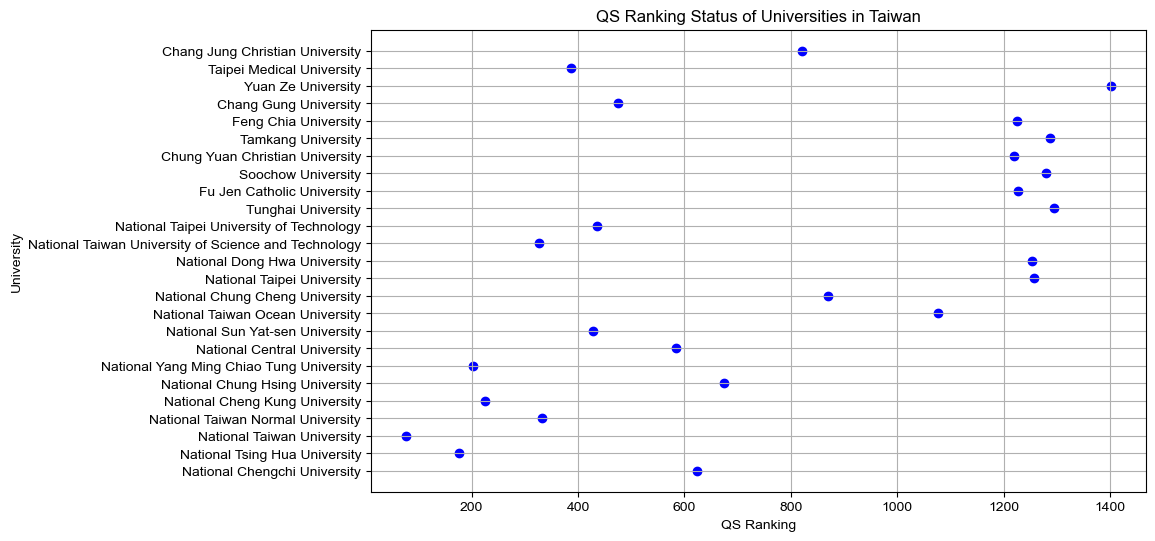

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(rank_result_df['Rank'], rank_result_df['Institution'], color='b', marker='o')

plt.xlabel('QS Ranking')
plt.ylabel('University')
plt.title('QS Ranking Status of Universities in Taiwan')

plt.grid(True)

plt.yticks(rank_result_df['Institution'])

plt.show()

## 9. 以每200名為區間，計算在該區間台灣有參與QS排名的大學，有多少間？

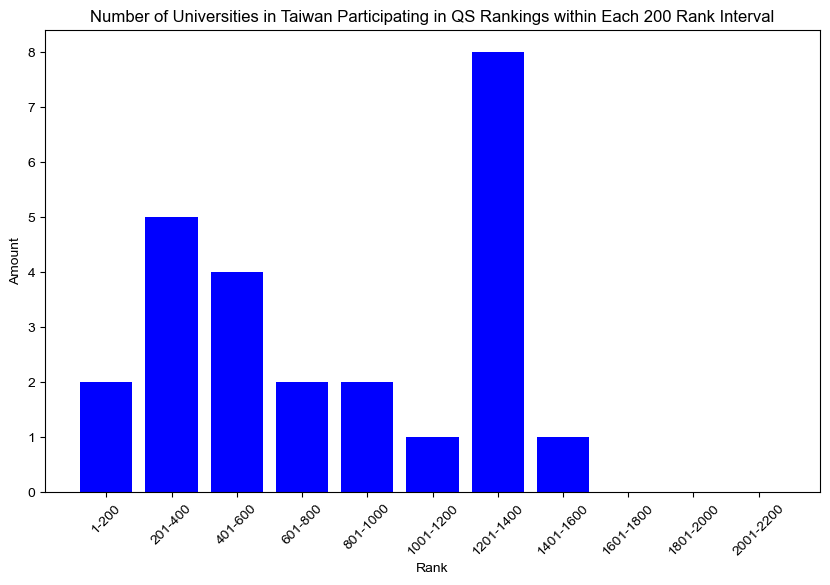

In [91]:
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200]
bin_labels = ['1-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1201-1400', '1401-1600', '1601-1800', '1801-2000', '2001-2200']

rank_result_df['RANK_AREA'] = pd.cut(rank_result_df['Rank'], bins=bins, labels=bin_labels)

count_per_interval = rank_result_df.groupby('RANK_AREA').size().reset_index(name='AMOUNT')

plt.figure(figsize=(10, 6))

plt.bar(count_per_interval['RANK_AREA'], count_per_interval['AMOUNT'], color='b')

plt.xlabel('Rank')
plt.ylabel('Amount')
plt.title('Number of Universities in Taiwan Participating in QS Rankings within Each 200 Rank Interval')
plt.xticks(rotation=45)

plt.show()


## 10. 以教育部高等教育深耕計畫經費，與QS排名的關係？

In [93]:
df_expenses = pd.read_csv('expenses.csv')
df_expenses.head()

,類別,學校代碼,學校名稱,核定經費
0,一般大學,1,國立政治大學,"332,581,716"
1,一般大學,2,國立清華大學,"1,227,485,103"
2,一般大學,3,國立臺灣大學,"2,466,494,187"
3,一般大學,4,國立臺灣師範大學,"324,963,949"
4,一般大學,5,國立成功大學,"1,421,845,095"


In [94]:
df_tw_uni.head()

,序號,學校代碼,公私立,體制,學校名稱,Institution,職稱,姓名,縣市別,第三級行政區,郵遞區號,學校地址,學校總機,學校傳真,網址
0,1,1,公立,一般大學,國立政治大學,National Chengchi University,校長,李蔡彥,臺北市,文山區,116011,臺北市文山區指南路2段64號,02-2939-3091,02-2937-9611,http://www.nccu.edu.tw
1,2,2,公立,一般大學,國立清華大學,National Tsing Hua University,校長,高為元,新竹市,新竹市,300044,新竹市光復路2段101號,03-571-5131,03-572-4038,http://www.nthu.edu.tw
2,3,3,公立,一般大學,國立臺灣大學,National Taiwan University,校長,管中閔,臺北市,大安區,106319,臺北市大安區羅斯福路4段1號,02-3366-3366,02-2362-7651,http://www.ntu.edu.tw
3,4,4,公立,一般大學,國立臺灣師範大學,National Taiwan Normal University,校長,吳正己,臺北市,大安區,106209,臺北市大安區和平東路1段162號,02-7749-1111,無,http://www.ntnu.edu.tw
4,5,5,公立,一般大學,國立成功大學,National Cheng Kung University,校長,蘇慧貞,臺南市,東 區,701401,臺南市東區大學路1號,06-275-7575,06-276-6462,https://www.ncku.edu.tw/


In [95]:
df_expenses = df_expenses.merge(df_tw_uni[['學校名稱', 'Institution']], left_on='學校名稱', right_on='學校名稱', how='left')

df_expenses.drop('學校名稱', axis=1, inplace=True)

In [96]:
df_expenses.head()

,類別,學校代碼,核定經費,Institution
0,一般大學,1,"332,581,716",National Chengchi University
1,一般大學,2,"1,227,485,103",National Tsing Hua University
2,一般大學,3,"2,466,494,187",National Taiwan University
3,一般大學,4,"324,963,949",National Taiwan Normal University
4,一般大學,5,"1,421,845,095",National Cheng Kung University


In [97]:
rank_result_df

,Institution,Rank,RANK_AREA
0,National Chengchi University,623,601-800
1,National Tsing Hua University,177,1-200
2,National Taiwan University,77,1-200
3,National Taiwan Normal University,332,201-400
4,National Cheng Kung University,225,201-400
5,National Chung Hsing University,674,601-800
6,National Yang Ming Chiao Tung University,202,201-400
7,National Central University,585,401-600
8,National Sun Yat-sen University,428,401-600
9,National Taiwan Ocean University,1077,1001-1200


In [98]:
merged_df = pd.merge(rank_result_df, df_expenses, on="Institution", how="inner")
merged_df

,Institution,Rank,RANK_AREA,類別,學校代碼,核定經費
0,National Chengchi University,623,601-800,一般大學,1,"332,581,716"
1,National Tsing Hua University,177,1-200,一般大學,2,"1,227,485,103"
2,National Taiwan University,77,1-200,一般大學,3,"2,466,494,187"
3,National Taiwan Normal University,332,201-400,一般大學,4,"324,963,949"
4,National Cheng Kung University,225,201-400,一般大學,5,"1,421,845,095"
5,National Chung Hsing University,674,601-800,一般大學,6,"450,197,237"
6,National Yang Ming Chiao Tung University,202,201-400,一般大學,7,"1,321,464,208"
7,National Central University,585,401-600,一般大學,8,"426,576,212"
8,National Sun Yat-sen University,428,401-600,一般大學,9,"405,826,790"
9,National Taiwan Ocean University,1077,1001-1200,一般大學,12,"136,547,127"


In [99]:
value = merged_df.loc[3, "核定經費"]
value

'324,963,949'

In [100]:
merged_df['核定經費'] = merged_df['核定經費'].str.replace(',', '', regex=True)

merged_df['核定經費'] = merged_df['核定經費'].astype(int)

In [101]:
value = merged_df.loc[3, "核定經費"]
value

324963949

In [102]:
merged_df

,Institution,Rank,RANK_AREA,類別,學校代碼,核定經費
0,National Chengchi University,623,601-800,一般大學,1,332581716
1,National Tsing Hua University,177,1-200,一般大學,2,1227485103
2,National Taiwan University,77,1-200,一般大學,3,2466494187
3,National Taiwan Normal University,332,201-400,一般大學,4,324963949
4,National Cheng Kung University,225,201-400,一般大學,5,1421845095
5,National Chung Hsing University,674,601-800,一般大學,6,450197237
6,National Yang Ming Chiao Tung University,202,201-400,一般大學,7,1321464208
7,National Central University,585,401-600,一般大學,8,426576212
8,National Sun Yat-sen University,428,401-600,一般大學,9,405826790
9,National Taiwan Ocean University,1077,1001-1200,一般大學,12,136547127


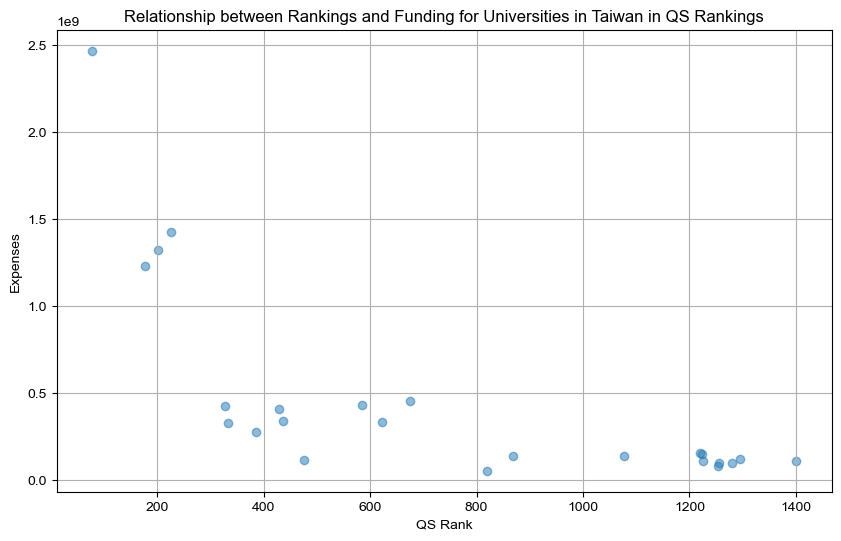

In [103]:
qs_ranking = merged_df['Rank']
education_investment = merged_df['核定經費']

merged_df_sorted = merged_df.sort_values(by='核定經費', ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(qs_ranking, education_investment, alpha=0.5)
plt.title('Relationship between Rankings and Funding for Universities in Taiwan in QS Rankings')
plt.xlabel('QS Rank')
plt.ylabel('Expenses')
plt.grid(True)
plt.show()

## 11. 各大學圖書總量與QS排名的關係？


臺灣資料為2021因此查看2022排名

In [104]:
df_library = pd.read_csv('library.csv')
df_library.head(1)

,學校代碼,學校名稱,縣市別,中文圖書收藏冊數(冊)-總類,中文圖書收藏冊數(冊)-哲學類,中文圖書收藏冊數(冊)-宗教類,中文圖書收藏冊數(冊)-科學類,中文圖書收藏冊數(冊)-應用科學類,中文圖書收藏冊數(冊)-社會科學類,中文圖書收藏冊數(冊)-史地類,...,電子期刊(種),電子書(種),視聽資料(件),圖書閱覽座位數(個),全年圖書(含視聽資料及其他館藏)借閱人次(人次),全年圖書(含視聽資料及其他館藏)借閱冊次(冊次),全年線上及光碟資料庫(含電子書及電子期刊)檢索(人次),報紙(種),中.日文期刊(種),西文期刊(種)
0,1,國立政治大學,30 臺北市,303081,46628,34971,29142,69942,279767,198168,...,97745,835758,27437,5055,162236,486708,6800626,77,616,489


In [105]:
df_library = pd.DataFrame(df_library)

def sum_columns(row):
    return row['中文圖書收藏冊數(冊)-總類'] + row['中文圖書收藏冊數(冊)-哲學類'] + row['中文圖書收藏冊數(冊)-宗教類'] + row['中文圖書收藏冊數(冊)-科學類'] + row['中文圖書收藏冊數(冊)-應用科學類'] + row['中文圖書收藏冊數(冊)-社會科學類'] + row['中文圖書收藏冊數(冊)-史地類'] + row['中文圖書收藏冊數(冊)-語言文學類'] + row['中文圖書收藏冊數(冊)-藝術類'] + row['外文圖書收藏冊數(冊)'] + row['期刊合訂本(未以圖書編目)(冊)'] + row['線上資料庫(種)'] + row['光碟及其他類型資料庫(種)'] + row['電子期刊(種)'] + row['電子書(種)'] + row['視聽資料(件)']

df_library['Sum'] = df_library.apply(sum_columns, axis=1)

df_library.head()

,學校代碼,學校名稱,縣市別,中文圖書收藏冊數(冊)-總類,中文圖書收藏冊數(冊)-哲學類,中文圖書收藏冊數(冊)-宗教類,中文圖書收藏冊數(冊)-科學類,中文圖書收藏冊數(冊)-應用科學類,中文圖書收藏冊數(冊)-社會科學類,中文圖書收藏冊數(冊)-史地類,...,電子書(種),視聽資料(件),圖書閱覽座位數(個),全年圖書(含視聽資料及其他館藏)借閱人次(人次),全年圖書(含視聽資料及其他館藏)借閱冊次(冊次),全年線上及光碟資料庫(含電子書及電子期刊)檢索(人次),報紙(種),中.日文期刊(種),西文期刊(種),Sum
0,1,國立政治大學,30 臺北市,303081,46628,34971,29142,69942,279767,198168,...,835758,27437,5055,162236,486708,6800626,77,616,489,2998732
1,2,國立清華大學,18 新竹市,89745,46496,25987,73735,92648,200657,132956,...,4475835,137646,3292,96997,247989,5435194,22,2047,690,6545360
2,3,國立臺灣大學,30 臺北市,231473,59948,64475,79160,212423,397743,282393,...,3411391,190337,3738,136754,530740,15207324,18,1771,1042,8089073
3,4,國立臺灣師範大學,30 臺北市,142752,75696,25256,63615,78810,257825,164720,...,1654000,103807,1356,54828,150225,6954263,12,400,1496,3629801
4,5,國立成功大學,21 臺南市,197537,36526,22598,43837,111370,130004,104078,...,969307,58325,2438,45854,320823,5440749,12,1651,108,3002959


In [106]:
column_names_library = df_library.columns.tolist()
print(column_names_library)

['學校代碼', '學校名稱', '縣市別', '中文圖書收藏冊數(冊)-總類', '中文圖書收藏冊數(冊)-哲學類', '中文圖書收藏冊數(冊)-宗教類', '中文圖書收藏冊數(冊)-科學類', '中文圖書收藏冊數(冊)-應用科學類', '中文圖書收藏冊數(冊)-社會科學類', '中文圖書收藏冊數(冊)-史地類', '中文圖書收藏冊數(冊)-語言文學類', '中文圖書收藏冊數(冊)-藝術類', '外文圖書收藏冊數(冊)', '期刊合訂本(未以圖書編目)(冊)', '線上資料庫(種)', '光碟及其他類型資料庫(種)', '電子期刊(種)', '電子書(種)', '視聽資料(件)', '圖書閱覽座位數(個)', '全年圖書(含視聽資料及其他館藏)借閱人次(人次)', '全年圖書(含視聽資料及其他館藏)借閱冊次(冊次)', '全年線上及光碟資料庫(含電子書及電子期刊)檢索(人次)', '報紙(種)', '中.日文期刊(種)', '西文期刊(種)', 'Sum']


In [107]:
df_library.columns = ['學校代碼', '學校名稱', '縣市別', '中文圖書收藏冊數(冊)-總類', '中文圖書收藏冊數(冊)-哲學類', '中文圖書收藏冊數(冊)-宗教類', '中文圖書收藏冊數(冊)-科學類', '中文圖書收藏冊數(冊)-應用科學類', '中文圖書收藏冊數(冊)-社會科學類', '中文圖書收藏冊數(冊)-史地類', '中文圖書收藏冊數(冊)-語言文學類', '中文圖書收藏冊數(冊)-藝術類', '外文圖書收藏冊數(冊)', '期刊合訂本(未以圖書編目)(冊)', '線上資料庫(種)', '光碟及其他類型資料庫(種)', '電子期刊(種)', '電子書(種)', '視聽資料(件)', '圖書閱覽座位數(個)', '全年圖書(含視聽資料及其他館藏)借閱人次(人次)', '全年圖書(含視聽資料及其他館藏)借閱冊次(冊次)', '全年線上及光碟資料庫(含電子書及電子期刊)檢索(人次)', '報紙(種)', '中.日文期刊(種)', '西文期刊(種)', 'Sum']

In [108]:
column_names_library = df_library.columns.tolist()
print(column_names_library)

['學校代碼', '學校名稱', '縣市別', '中文圖書收藏冊數(冊)-總類', '中文圖書收藏冊數(冊)-哲學類', '中文圖書收藏冊數(冊)-宗教類', '中文圖書收藏冊數(冊)-科學類', '中文圖書收藏冊數(冊)-應用科學類', '中文圖書收藏冊數(冊)-社會科學類', '中文圖書收藏冊數(冊)-史地類', '中文圖書收藏冊數(冊)-語言文學類', '中文圖書收藏冊數(冊)-藝術類', '外文圖書收藏冊數(冊)', '期刊合訂本(未以圖書編目)(冊)', '線上資料庫(種)', '光碟及其他類型資料庫(種)', '電子期刊(種)', '電子書(種)', '視聽資料(件)', '圖書閱覽座位數(個)', '全年圖書(含視聽資料及其他館藏)借閱人次(人次)', '全年圖書(含視聽資料及其他館藏)借閱冊次(冊次)', '全年線上及光碟資料庫(含電子書及電子期刊)檢索(人次)', '報紙(種)', '中.日文期刊(種)', '西文期刊(種)', 'Sum']


In [109]:
df_tw_uni.head()

,序號,學校代碼,公私立,體制,學校名稱,Institution,職稱,姓名,縣市別,第三級行政區,郵遞區號,學校地址,學校總機,學校傳真,網址
0,1,1,公立,一般大學,國立政治大學,National Chengchi University,校長,李蔡彥,臺北市,文山區,116011,臺北市文山區指南路2段64號,02-2939-3091,02-2937-9611,http://www.nccu.edu.tw
1,2,2,公立,一般大學,國立清華大學,National Tsing Hua University,校長,高為元,新竹市,新竹市,300044,新竹市光復路2段101號,03-571-5131,03-572-4038,http://www.nthu.edu.tw
2,3,3,公立,一般大學,國立臺灣大學,National Taiwan University,校長,管中閔,臺北市,大安區,106319,臺北市大安區羅斯福路4段1號,02-3366-3366,02-2362-7651,http://www.ntu.edu.tw
3,4,4,公立,一般大學,國立臺灣師範大學,National Taiwan Normal University,校長,吳正己,臺北市,大安區,106209,臺北市大安區和平東路1段162號,02-7749-1111,無,http://www.ntnu.edu.tw
4,5,5,公立,一般大學,國立成功大學,National Cheng Kung University,校長,蘇慧貞,臺南市,東 區,701401,臺南市東區大學路1號,06-275-7575,06-276-6462,https://www.ncku.edu.tw/


In [110]:
merged_df = pd.merge(df_tw_uni, df_library, on='學校名稱')

lib_result_df = merged_df[['Institution', 'Sum']]
lib_result_df

,Institution,Sum
0,National Chengchi University,2998732
1,National Tsing Hua University,6545360
2,National Taiwan University,8089073
3,National Taiwan Normal University,3629801
4,National Cheng Kung University,3002959
...,...,...
105,Yuh-Ing Junior College of Health Care & Manage...,86999
106,"St. Mary´s Junior College of Medicine, Nursing...",142290
107,Hsin Sheng Junior College of Medical Care and ...,191811
108,"Chung-Jen Junior College of Nursing, Health Sc...",139380


In [111]:
rank_result_df.head()

,Institution,Rank,RANK_AREA
0,National Chengchi University,623,601-800
1,National Tsing Hua University,177,1-200
2,National Taiwan University,77,1-200
3,National Taiwan Normal University,332,201-400
4,National Cheng Kung University,225,201-400


In [112]:
lib_result_df.head(1)

,Institution,Sum
0,National Chengchi University,2998732


In [113]:
merged_df = pd.merge(rank_result_df, lib_result_df, on='Institution')

lib_rank_result_df = merged_df[['Institution', 'Sum', 'Rank']]
lib_rank_result_df

,Institution,Sum,Rank
0,National Chengchi University,2998732,623
1,National Tsing Hua University,6545360,177
2,National Taiwan University,8089073,77
3,National Taiwan Normal University,3629801,332
4,National Cheng Kung University,3002959,225
5,National Chung Hsing University,2700803,674
6,National Yang Ming Chiao Tung University,2718425,202
7,National Central University,4033472,585
8,National Sun Yat-sen University,1650726,428
9,National Taiwan Ocean University,952579,1077


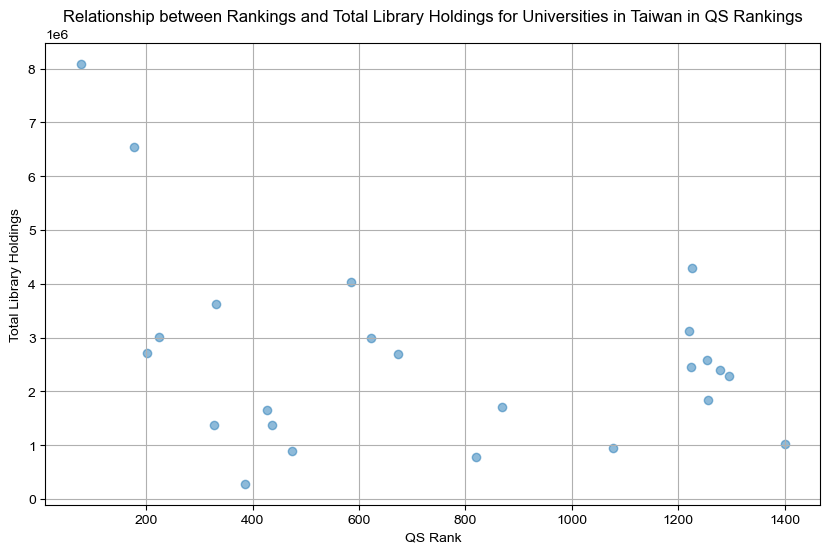

In [114]:
qs_ranking = lib_rank_result_df['Rank']
education_investment = lib_rank_result_df['Sum']

merged_df_sorted = merged_df.sort_values(by='Sum', ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(qs_ranking, education_investment, alpha=0.5)
plt.title('Relationship between Rankings and Total Library Holdings for Universities in Taiwan in QS Rankings')
plt.xlabel('QS Rank')
plt.ylabel('Total Library Holdings')
plt.grid(True)
plt.show()

### 把英文名字merge到df_library中

In [116]:
en_lib_merged_df = df_library.merge(df_tw_uni[['學校名稱', 'Institution']], on='學校名稱', how='left')

en_lib_merged_df.to_csv('merged_library_data.csv', index=False)
en_lib_merged_df.head()

,學校代碼,學校名稱,縣市別,中文圖書收藏冊數(冊)-總類,中文圖書收藏冊數(冊)-哲學類,中文圖書收藏冊數(冊)-宗教類,中文圖書收藏冊數(冊)-科學類,中文圖書收藏冊數(冊)-應用科學類,中文圖書收藏冊數(冊)-社會科學類,中文圖書收藏冊數(冊)-史地類,...,視聽資料(件),圖書閱覽座位數(個),全年圖書(含視聽資料及其他館藏)借閱人次(人次),全年圖書(含視聽資料及其他館藏)借閱冊次(冊次),全年線上及光碟資料庫(含電子書及電子期刊)檢索(人次),報紙(種),中.日文期刊(種),西文期刊(種),Sum,Institution
0,1,國立政治大學,30 臺北市,303081,46628,34971,29142,69942,279767,198168,...,27437,5055,162236,486708,6800626,77,616,489,2998732,National Chengchi University
1,2,國立清華大學,18 新竹市,89745,46496,25987,73735,92648,200657,132956,...,137646,3292,96997,247989,5435194,22,2047,690,6545360,National Tsing Hua University
2,3,國立臺灣大學,30 臺北市,231473,59948,64475,79160,212423,397743,282393,...,190337,3738,136754,530740,15207324,18,1771,1042,8089073,National Taiwan University
3,4,國立臺灣師範大學,30 臺北市,142752,75696,25256,63615,78810,257825,164720,...,103807,1356,54828,150225,6954263,12,400,1496,3629801,National Taiwan Normal University
4,5,國立成功大學,21 臺南市,197537,36526,22598,43837,111370,130004,104078,...,58325,2438,45854,320823,5440749,12,1651,108,3002959,National Cheng Kung University


## 12. 各大學圖書閱覽座位數與QS排名的關係？

In [117]:
merged_df = pd.merge(rank_result_df, en_lib_merged_df, on='Institution')

seat_rank_result_df = merged_df[['Institution', '圖書閱覽座位數(個)', 'Rank']]
seat_rank_result_df

,Institution,圖書閱覽座位數(個),Rank
0,National Chengchi University,5055,623
1,National Tsing Hua University,3292,177
2,National Taiwan University,3738,77
3,National Taiwan Normal University,1356,332
4,National Cheng Kung University,2438,225
5,National Chung Hsing University,2047,674
6,National Yang Ming Chiao Tung University,2241,202
7,National Central University,1485,585
8,National Sun Yat-sen University,1057,428
9,National Taiwan Ocean University,533,1077


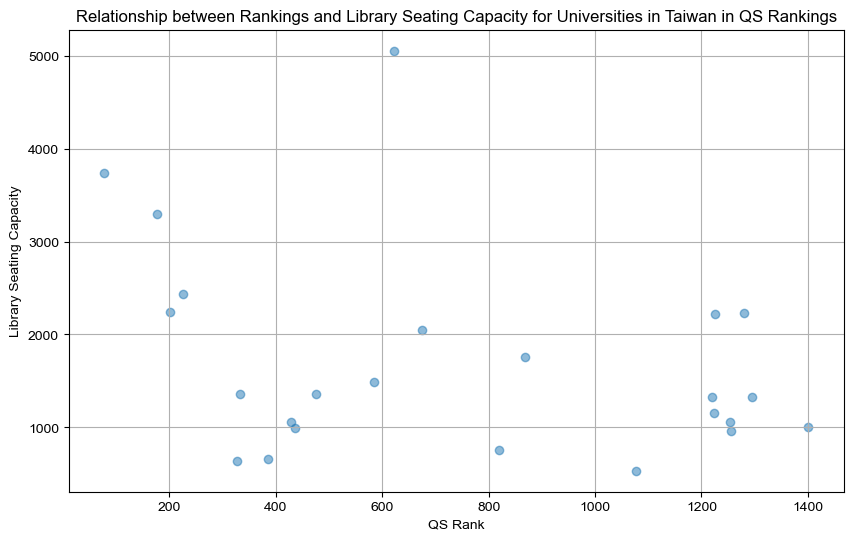

In [119]:
qs_ranking = seat_rank_result_df['Rank']
education_investment = seat_rank_result_df['圖書閱覽座位數(個)']

merged_df_sorted = merged_df.sort_values(by='圖書閱覽座位數(個)', ascending=False)

plt.figure(figsize=(10, 6)) 
plt.scatter(qs_ranking, education_investment, alpha=0.5)
plt.title('Relationship between Rankings and Library Seating Capacity for Universities in Taiwan in QS Rankings')
plt.xlabel('QS Rank')
plt.ylabel('Library Seating Capacity')
plt.grid(True)
plt.show()

## 13. 各大學全年圖書(含視聽資料及其他館藏)借閱人次與QS排名的關係？

In [120]:
merged_df = pd.merge(rank_result_df, en_lib_merged_df, on='Institution')

borrow_rank_result_df = merged_df[['Institution', '全年圖書(含視聽資料及其他館藏)借閱人次(人次)', 'Rank']]
borrow_rank_result_df

,Institution,全年圖書(含視聽資料及其他館藏)借閱人次(人次),Rank
0,National Chengchi University,162236,623
1,National Tsing Hua University,96997,177
2,National Taiwan University,136754,77
3,National Taiwan Normal University,54828,332
4,National Cheng Kung University,45854,225
5,National Chung Hsing University,55748,674
6,National Yang Ming Chiao Tung University,59302,202
7,National Central University,35498,585
8,National Sun Yat-sen University,21697,428
9,National Taiwan Ocean University,11485,1077


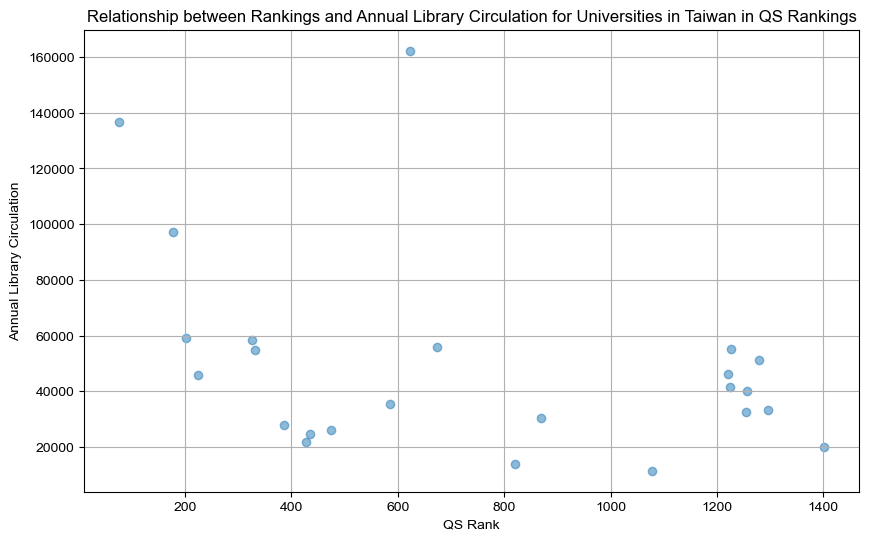

In [121]:
qs_ranking = borrow_rank_result_df['Rank']
education_investment = borrow_rank_result_df['全年圖書(含視聽資料及其他館藏)借閱人次(人次)']

merged_df_sorted = merged_df.sort_values(by='全年圖書(含視聽資料及其他館藏)借閱人次(人次)', ascending=False)

plt.figure(figsize=(10, 6)) 
plt.scatter(qs_ranking, education_investment, alpha=0.5) 
plt.title('Relationship between Rankings and Annual Library Circulation for Universities in Taiwan in QS Rankings')
plt.xlabel('QS Rank')
plt.ylabel('Annual Library Circulation')
plt.grid(True)
plt.show()

### 考量學校總人數問題，計算比例

In [142]:
df_student = pd.read_csv('student.csv')
df_student.head()

,學校代碼,學校名稱,日間∕進修別,等級別,總計,男生計,女生計,一年級男生,一年級女生,二年級男生,...,五年級男生,五年級女生,六年級男生,六年級女生,七年級男生,七年級女生,延修生男生,延修生女生,縣市名稱,體系別
0,1,國立政治大學,D 日,D 博士,948,537,411,88,67,81,...,71,57,71,40,61,52,-,-,30 臺北市,1 一般
1,1,國立政治大學,D 日,M 碩士,"3,974","1,828","2,146",624,729,591,...,3,-,-,-,-,-,-,-,30 臺北市,1 一般
2,1,國立政治大學,D 日,B 學士,"9,556","3,920","5,636",900,"1,303",920,...,-,-,-,-,-,-,289,423,30 臺北市,1 一般
3,1,國立政治大學,N 職,M 碩士,"1,632",779,853,227,294,239,...,72,65,1,-,-,-,-,-,30 臺北市,1 一般
4,2,國立清華大學,D 日,D 博士,"1,663","1,192",471,248,114,193,...,112,47,95,31,165,54,-,-,18 新竹市,1 一般


In [143]:
df_student['總計'] = df_student['總計'].str.replace(',', '', regex=True)

df_student['總計'] = df_student['總計'].astype(int)

In [144]:
df_student.head()

,學校代碼,學校名稱,日間∕進修別,等級別,總計,男生計,女生計,一年級男生,一年級女生,二年級男生,...,五年級男生,五年級女生,六年級男生,六年級女生,七年級男生,七年級女生,延修生男生,延修生女生,縣市名稱,體系別
0,1,國立政治大學,D 日,D 博士,948,537,411,88,67,81,...,71,57,71,40,61,52,-,-,30 臺北市,1 一般
1,1,國立政治大學,D 日,M 碩士,3974,"1,828","2,146",624,729,591,...,3,-,-,-,-,-,-,-,30 臺北市,1 一般
2,1,國立政治大學,D 日,B 學士,9556,"3,920","5,636",900,"1,303",920,...,-,-,-,-,-,-,289,423,30 臺北市,1 一般
3,1,國立政治大學,N 職,M 碩士,1632,779,853,227,294,239,...,72,65,1,-,-,-,-,-,30 臺北市,1 一般
4,2,國立清華大學,D 日,D 博士,1663,"1,192",471,248,114,193,...,112,47,95,31,165,54,-,-,18 新竹市,1 一般


In [145]:
df_student['total_stu'] = df_student.groupby('學校代碼')['總計'].transform('sum')

df_student.head()

,學校代碼,學校名稱,日間∕進修別,等級別,總計,男生計,女生計,一年級男生,一年級女生,二年級男生,...,五年級女生,六年級男生,六年級女生,七年級男生,七年級女生,延修生男生,延修生女生,縣市名稱,體系別,total_stu
0,1,國立政治大學,D 日,D 博士,948,537,411,88,67,81,...,57,71,40,61,52,-,-,30 臺北市,1 一般,16110
1,1,國立政治大學,D 日,M 碩士,3974,"1,828","2,146",624,729,591,...,-,-,-,-,-,-,-,30 臺北市,1 一般,16110
2,1,國立政治大學,D 日,B 學士,9556,"3,920","5,636",900,"1,303",920,...,-,-,-,-,-,289,423,30 臺北市,1 一般,16110
3,1,國立政治大學,N 職,M 碩士,1632,779,853,227,294,239,...,65,1,-,-,-,-,-,30 臺北市,1 一般,16110
4,2,國立清華大學,D 日,D 博士,1663,"1,192",471,248,114,193,...,47,95,31,165,54,-,-,18 新竹市,1 一般,17488


In [146]:
en_stu_merged_df = df_student.merge(df_tw_uni[['學校名稱', 'Institution']], on='學校名稱', how='left')

en_stu_merged_df.to_csv('merged_library_data.csv', index=False)
en_stu_merged_df.head()

,學校代碼,學校名稱,日間∕進修別,等級別,總計,男生計,女生計,一年級男生,一年級女生,二年級男生,...,六年級男生,六年級女生,七年級男生,七年級女生,延修生男生,延修生女生,縣市名稱,體系別,total_stu,Institution
0,1,國立政治大學,D 日,D 博士,948,537,411,88,67,81,...,71,40,61,52,-,-,30 臺北市,1 一般,16110,National Chengchi University
1,1,國立政治大學,D 日,M 碩士,3974,"1,828","2,146",624,729,591,...,-,-,-,-,-,-,30 臺北市,1 一般,16110,National Chengchi University
2,1,國立政治大學,D 日,B 學士,9556,"3,920","5,636",900,"1,303",920,...,-,-,-,-,289,423,30 臺北市,1 一般,16110,National Chengchi University
3,1,國立政治大學,N 職,M 碩士,1632,779,853,227,294,239,...,1,-,-,-,-,-,30 臺北市,1 一般,16110,National Chengchi University
4,2,國立清華大學,D 日,D 博士,1663,"1,192",471,248,114,193,...,95,31,165,54,-,-,18 新竹市,1 一般,17488,National Tsing Hua University


In [147]:
borrow_rank_result_df.head(3)

,Institution,全年圖書(含視聽資料及其他館藏)借閱人次(人次),Rank
0,National Chengchi University,162236,623
1,National Tsing Hua University,96997,177
2,National Taiwan University,136754,77


In [148]:
merged_df = pd.merge(borrow_rank_result_df, en_stu_merged_df, on='Institution')

stu_borrow_rank_result_df = merged_df[['Institution', '全年圖書(含視聽資料及其他館藏)借閱人次(人次)', 'total_stu', 'Rank']]
stu_borrow_rank_result_df

,Institution,全年圖書(含視聽資料及其他館藏)借閱人次(人次),total_stu,Rank
0,National Chengchi University,162236,16110,623
1,National Chengchi University,162236,16110,623
2,National Chengchi University,162236,16110,623
3,National Chengchi University,162236,16110,623
4,National Tsing Hua University,96997,17488,177
...,...,...,...,...
107,Chang Jung Christian University,13793,7849,820
108,Chang Jung Christian University,13793,7849,820
109,Chang Jung Christian University,13793,7849,820
110,Chang Jung Christian University,13793,7849,820


In [149]:
stu_borrow_rank_result_df = stu_borrow_rank_result_df.drop_duplicates()
stu_borrow_rank_result_df

,Institution,全年圖書(含視聽資料及其他館藏)借閱人次(人次),total_stu,Rank
0,National Chengchi University,162236,16110,623
4,National Tsing Hua University,96997,17488,177
9,National Taiwan University,136754,32923,77
13,National Taiwan Normal University,54828,16164,332
17,National Cheng Kung University,45854,22406,225
21,National Chung Hsing University,55748,15154,674
26,National Yang Ming Chiao Tung University,59302,20412,202
30,National Central University,35498,12128,585
34,National Sun Yat-sen University,21697,9897,428
38,National Taiwan Ocean University,11485,9068,1077


In [150]:
stu_borrow_rank_result_df.reset_index(drop=True, inplace=True)

stu_borrow_rank_result_df

,Institution,全年圖書(含視聽資料及其他館藏)借閱人次(人次),total_stu,Rank
0,National Chengchi University,162236,16110,623
1,National Tsing Hua University,96997,17488,177
2,National Taiwan University,136754,32923,77
3,National Taiwan Normal University,54828,16164,332
4,National Cheng Kung University,45854,22406,225
5,National Chung Hsing University,55748,15154,674
6,National Yang Ming Chiao Tung University,59302,20412,202
7,National Central University,35498,12128,585
8,National Sun Yat-sen University,21697,9897,428
9,National Taiwan Ocean University,11485,9068,1077


In [153]:
stu_borrow_rank_result_df

,Institution,全年圖書(含視聽資料及其他館藏)借閱人次(人次),total_stu,Rank
0,National Chengchi University,162236,16110,623
1,National Tsing Hua University,96997,17488,177
2,National Taiwan University,136754,32923,77
3,National Taiwan Normal University,54828,16164,332
4,National Cheng Kung University,45854,22406,225
5,National Chung Hsing University,55748,15154,674
6,National Yang Ming Chiao Tung University,59302,20412,202
7,National Central University,35498,12128,585
8,National Sun Yat-sen University,21697,9897,428
9,National Taiwan Ocean University,11485,9068,1077


In [154]:
stu_borrow_rank_result_df["bottow/stu"] = None

# 遍历DataFrame的每一行并执行除法操作
for i in range(len(stu_borrow_rank_result_df)):
    numerator = stu_borrow_rank_result_df.loc[i, "全年圖書(含視聽資料及其他館藏)借閱人次(人次)"]
    denominator = stu_borrow_rank_result_df.loc[i, "total_stu"]
    if denominator != 0:
        stu_borrow_rank_result_df.at[i, "bottow/stu"] = numerator / denominator
    else:
        stu_borrow_rank_result_df.at[i, "bottow/stu"] = None

stu_borrow_rank_result_df

/var/folders/zs/h5hxmzb56w92fyghx3mfp69w0000gn/T/ipykernel_5792/2823629724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stu_borrow_rank_result_df["bottow/stu"] = None


,Institution,全年圖書(含視聽資料及其他館藏)借閱人次(人次),total_stu,Rank,bottow/stu
0,National Chengchi University,162236,16110,623,10.070515
1,National Tsing Hua University,96997,17488,177,5.546489
2,National Taiwan University,136754,32923,77,4.153753
3,National Taiwan Normal University,54828,16164,332,3.391982
4,National Cheng Kung University,45854,22406,225,2.046505
5,National Chung Hsing University,55748,15154,674,3.678765
6,National Yang Ming Chiao Tung University,59302,20412,202,2.905252
7,National Central University,35498,12128,585,2.926946
8,National Sun Yat-sen University,21697,9897,428,2.19228
9,National Taiwan Ocean University,11485,9068,1077,1.266542


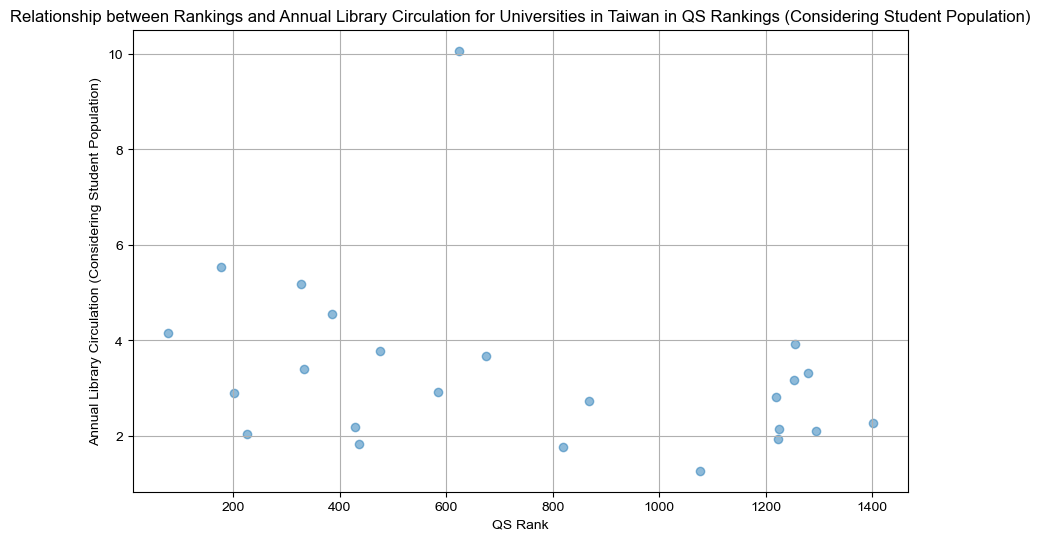

In [156]:
qs_ranking = stu_borrow_rank_result_df['Rank']
b_s = stu_borrow_rank_result_df['bottow/stu']

merged_df_sorted = stu_borrow_rank_result_df.sort_values(by='bottow/stu', ascending=False)

plt.figure(figsize=(10, 6)) 
plt.scatter(qs_ranking, b_s, alpha=0.5)  
plt.title('Relationship between Rankings and Annual Library Circulation for Universities in Taiwan in QS Rankings (Considering Student Population)')
plt.xlabel('QS Rank')
plt.ylabel('Annual Library Circulation (Considering Student Population)')
plt.grid(True)
plt.show()